In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')


### Step 1: Read The dataset

In [1]:
import pandas as pd
df= pd.read_csv('iris.csv')
df.head()

C:\Users\pandi\AppData\Local\Temp\ipykernel_29232\1366353262.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Perform Basic Data Quality Checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.duplicated().sum()

1

### Seperate X & Y

In [5]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [6]:
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [8]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

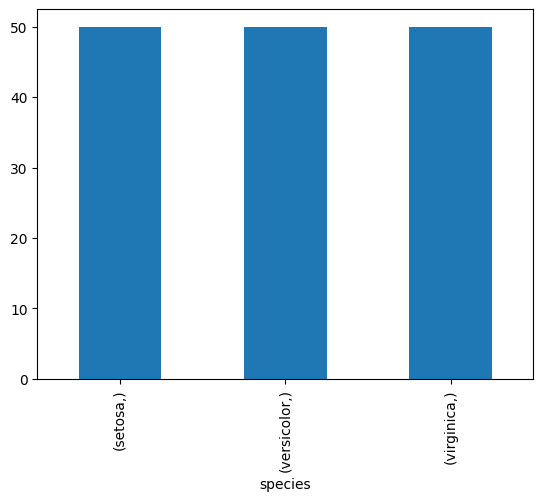

In [9]:
Y.value_counts().plot(kind='bar')

### Step 4: Apply preprocessing on X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('scaler',StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre= num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5: Apply Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X_pre,Y, test_size=0.33,random_state=21)

In [14]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.280340,0.098217,0.649083,0.395774
49,-1.021849,0.558611,-1.340227,-1.315444
65,1.038005,0.098217,0.364896,0.264142
118,2.249683,-1.052767,1.785832,1.448832
55,-0.173674,-0.592373,0.421734,0.132510


In [15]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [16]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [17]:
xtrain.shape


(100, 4)

In [18]:
xtest.shape

(50, 4)

### Step 6: Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

d:\ML1\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
model.intercept_

array([-0.1627398 ,  1.82302367, -1.66028386])

In [22]:
model.coef_

array([[-0.93728904,  1.24988548, -1.63694748, -1.61318588],
       [ 0.38686136, -0.37382492, -0.41064574, -0.59860246],
       [ 0.55042768, -0.87606056,  2.04759322,  2.21178835]])

### Step 7: Model Evaluation

In [24]:
# Predict the results for train & test
ypred_train= model.predict(xtrain)
ypred_test=model.predict(xtest)

In [25]:
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [26]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [27]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [28]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [29]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [30]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)